In [ ]:
!pip install -q transformers torch torchvision pillow

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from IPython.display import display, HTML
import requests
from io import BytesIO
import base64   # <- correct spelling


In [ ]:
VIBE_LABELS = [
    "happy", "joyful", "cheerful", "playful", "fun", "excited", "energetic",
    "calm", "peaceful", "serene", "relaxing", "zen", "quiet",
    "moody", "melancholy", "gloomy", "sad", "lonely", "cold",
    "romantic", "cozy", "intimate", "warm", "loving", "tender",
    "dramatic", "intense", "mysterious", "dark", "edgy", "gritty",
    "aesthetic", "vintage", "dreamy", "ethereal", "soft", "elegant", "minimalist",
    "vibrant", "colorful", "bold", "bright", "sunny", "festive",
    "natural", "outdoorsy", "adventurous", "wild", "rustic",
    "urban", "grunge", "cyberpunk", "futuristic", "retro", "noir",
]  #  ← this bracket (and comma before it) fixes the syntax


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

Saving excited image.jpeg to excited image.jpeg


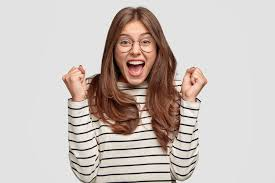

In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload an image file

# Correct file handling
for filename, file_content in uploaded.items():
    image = Image.open(BytesIO(file_content)).convert("RGB")
    display(image)
    break  # Only one image


In [ ]:
def predict_vibe(image):
    inputs = processor(text=VIBE_LABELS, images=image, return_tensors="pt", padding=True).to(device)
    outputs = model(**inputs)
    probs = outputs.logits_per_image.softmax(dim=1).cpu().detach().numpy().flatten()
    top_vibe = VIBE_LABELS[probs.argmax()]
    confidence = round(probs.max() * 100, 2)
    return top_vibe, confidence


In [ ]:
SPOTIFY_CLIENT_ID = "ac1f4e5f3f4c4313aaec19d75158f13e"
SPOTIFY_CLIENT_SECRET = "a7648ba7fde748d5b0f9dd4f3c50e05c"

In [ ]:
def get_spotify_token(client_id, client_secret):
    auth_str = f"{client_id}:{client_secret}"
    b64_auth = base64.b64encode(auth_str.encode()).decode()
    headers = {"Authorization": f"Basic {b64_auth}"}
    data = {"grant_type": "client_credentials"}
    resp = requests.post("https://accounts.spotify.com/api/token", data=data, headers=headers)
    resp.raise_for_status()
    return resp.json()["access_token"]

def recommend_song(vibe, token):
    headers = {"Authorization": f"Bearer {token}"}
    # Mapping vibe to target audio features
    vibe_features = {
        "happy": {"target_valence": 0.9, "min_energy": 0.6},
        "sad": {"target_valence": 0.2, "max_energy": 0.4},
        "calm": {"target_valence": 0.5, "max_energy": 0.3},
        "excited": {"target_valence": 0.9, "min_energy": 0.8},
        "romantic": {"target_valence": 0.7, "min_energy": 0.4}
    }

    features = vibe_features.get(vibe.lower(), {"target_valence": 0.5})
    params = {
        "seed_genres": "pop",  # You can change or expand seeds
        "limit": 1,
        **features
    }

    resp = requests.get("https://api.spotify.com/v1/recommendations", headers=headers, params=params)
    resp.raise_for_status()
    tracks = resp.json()["tracks"]
    if not tracks:
        return None
    track = tracks[0]
    return {
        "title": track["name"],
        "artist": track["artists"][0]["name"],
        "url": track["external_urls"]["spotify"],
        "preview_url": track["preview_url"],
        "album_art": track["album"]["images"][0]["url"]
    }
    resp.raise_for_status()
    items = resp.json()["tracks"]["items"]
    if not items:
        return None
    track = items[0]
    return {
        "title": track["name"],
        "artist": track["artists"][0]["name"],
        "url": track["external_urls"]["spotify"],
        "preview_url": track["preview_url"],
        "album_art": track["album"]["images"][0]["url"]
    }


In [ ]:
def recommend_song(vibe, token):
    headers = {"Authorization": f"Bearer {token}"}

    vibe_features = {
        "happy": {"target_valence": 0.9, "min_energy": 0.6},
        "sad": {"target_valence": 0.2, "max_energy": 0.4},
        "calm": {"target_valence": 0.5, "max_energy": 0.3},
        "excited": {"target_valence": 0.9, "min_energy": 0.8},
        "romantic": {"target_valence": 0.7, "min_energy": 0.4},
    }

    features = vibe_features.get(vibe.lower(), {"target_valence": 0.5})
    params = {
        "seed_genres": "pop",
        "limit": 1,
        **features
    }

    import requests
    resp = requests.get("https://api.spotify.com/v1/recommendations", headers=headers, params=params)
    resp.raise_for_status()
    tracks = resp.json()["tracks"]
    if not tracks:
        return None

    track = tracks[0]
    return {
        "title": track["name"],
        "artist": track["artists"][0]["name"],
        "url": track["external_urls"]["spotify"],
        "preview_url": track["preview_url"],
        "album_art": track["album"]["images"][0]["url"]
    }


In [ ]:
def recommend_song(vibe, token):
    headers = {"Authorization": f"Bearer {token}"}

    vibe_features = {
        "happy": {"target_valence": 0.9, "min_energy": 0.6},
        "sad": {"target_valence": 0.2, "max_energy": 0.4},
        "calm": {"target_valence": 0.5, "max_energy": 0.3},
        "excited": {"target_valence": 0.9, "min_energy": 0.8},
        "romantic": {"target_valence": 0.7, "min_energy": 0.4},
    }

    features = vibe_features.get(vibe.lower(), {"target_valence": 0.5})
    params = {
        "seed_genres": "pop",  # Add more like "pop,rock,indie" if needed
        "limit": 1,
        **features
    }

    resp = requests.get("https://api.spotify.com/v1/recommendations", headers=headers, params=params)
    resp.raise_for_status()
    tracks = resp.json()["tracks"]
    if not tracks:
        return None

    track = tracks[0]
    return {
        "title": track["name"],
        "artist": track["artists"][0]["name"],
        "url": track["external_urls"]["spotify"],
        "preview_url": track["preview_url"],
        "album_art": track["album"]["images"][0]["url"]
    }


In [ ]:
top_vibe, confidence = predict_vibe(image)
token = get_spotify_token(SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET)
song = search_song(top_vibe, token)



# Display everything
print(f"🎨 Predicted Vibe: {top_vibe} ({confidence}%)")
if song:
    display(HTML(f"""
        <h3>🎵 {song['title']} – {song['artist']}</h3>
        <img src="{song['album_art']}" width="250"/>
        <p><a href="{song['url']}" target="_blank">Open in Spotify</a></p>
        {'<audio controls src="' + song['preview_url'] + '"></audio>' if song['preview_url'] else 'No preview available'}
    """))
else:
    print("❌ No song found for this vibe.")

🎨 Predicted Vibe: happy (35.2599983215332%)


In [ ]:

!pip install transformers


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

caption_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
caption_model = GPT2LMHeadModel.from_pretrained("gpt2")
caption_model.eval()


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
def generate_caption(vibe, max_length=30):
    prompt = f"A photo that feels {vibe}. Instagram caption:"
    inputs = caption_tokenizer.encode(prompt, return_tensors="pt")

    outputs = caption_model.generate(
        inputs,
        max_length=max_length,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=0.9,
        pad_token_id=caption_tokenizer.eos_token_id,
        num_return_sequences=1
    )

    generated_text = caption_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text.replace(prompt, "").strip()


In [ ]:
# Step 1: Predict the vibe
top_vibe, confidence = predict_vibe(image)

# Step 2: Get Spotify song
token = get_spotify_token(SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET)
song = search_song(top_vibe, token)

# Step 3: Generate caption
caption = generate_caption(top_vibe)

# Display everything
print(f"🎨 Vibe: {top_vibe} ({confidence}%)")
print(f"✍️ Caption: {caption}")

if song:
    display(HTML(f"""
        <h3>🎵 {song['title']} – {song['artist']}</h3>
        <img src="{song['album_art']}" width="250"/>
        <p><a href="{song['url']}" target="_blank">Open in Spotify</a></p>
        {'<audio controls src="' + song['preview_url'] + '"></audio>' if song['preview_url'] else 'No preview available'}
    """))
else:
    print("❌ No song found for this vibe.")


🎨 Vibe: happy (35.2599983215332%)
✍️ Caption: "Happy Hour at Starbucks!"

Sugar

Pizza

Soup

P


In [ ]:
def generate_hashtags(vibe):
    vibe_hashtags = {
        "happy": ["#HappyVibes", "#SmilesAllAround", "#FeelGood"],
        "joyful": ["#PureJoy", "#SunshineStateOfMind", "#JoyfulMoments"],
        "calm": ["#Peaceful", "#CalmVibes", "#Serenity"],
        "moody": ["#MoodyTones", "#DarkVibes", "#InMyFeels"],
        "romantic": ["#RomanticMood", "#LoveInTheAir", "#HeartEyes"],
        "dreamy": ["#Dreamscape", "#LostInDreams", "#WanderMind"],
        "dark": ["#DarkAesthetic", "#GothCore", "#ShadowMood"],
        "vibrant": ["#ColorSplash", "#VividVibes", "#ElectricFeel"],
        "grunge": ["#GrungeStyle", "#90sVibes", "#AlternativeMood"],
        "futuristic": ["#CyberVibes", "#FutureFeels", "#NextGenLook"],
        "vintage": ["#RetroVibes", "#OldSchoolCool", "#VintageFeels"],
        "cozy": ["#CozyCorner", "#WarmVibes", "#HyggeLife"],
        "energetic": ["#HighEnergy", "#LetsGo", "#PumpedUp"],
        "intense": ["#BoldLooks", "#PowerMood", "#DramaVibes"],
        "mysterious": ["#MysteryMood", "#Shadowed", "#HiddenStories"],
        "urban": ["#CityVibes", "#StreetStyle", "#UrbanMood"],
        "retro": ["#ThrowbackFeels", "#RetroAesthetic", "#BackInTime"],
        "ethereal": ["#EtherealEnergy", "#LightAndAiry", "#Otherworldly"],
        "sad": ["#SadBoiHours", "#AloneThoughts", "#MelancholyMood"]
    }

    return vibe_hashtags.get(vibe, ["#VibeCheck", "#FeelingIt", "#JustPosted"])


In [ ]:
# Step 1: Predict vibe
top_vibe, confidence = predict_vibe(image)

# Step 2: Fetch song
token = get_spotify_token(SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET)
song = search_song(top_vibe, token)

# Step 3: Generate caption
caption = generate_caption(top_vibe)

# Step 4: Generate hashtags
hashtags = generate_hashtags(top_vibe)
hashtag_text = " ".join(hashtags)

# 🖼️ Display everything
print(f"🎨 Vibe: {top_vibe} ({confidence}%)")
print(f"✍️ Caption: {caption}")
print(f"🏷️ Hashtags: {hashtag_text}")

if song:
    display(HTML(f"""
        <h3>🎵 {song['title']} – {song['artist']}</h3>
        <img src="{song['album_art']}" width="250"/>
        <p><a href="{song['url']}" target="_blank">Open in Spotify</a></p>
        {'<audio controls src="' + song['preview_url'] + '"></audio>' if song['preview_url'] else 'No preview available'}
    """))
else:
    print("❌ No song found for this vibe.")


🎨 Vibe: happy (35.2599983215332%)
✍️ Caption: I have a feeling you're going to love it. If this is the best thing ever…
🏷️ Hashtags: #HappyVibes #SmilesAllAround #FeelGood


In [1]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00
